In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv(r"D:\CSV FILES/Sample - Superstore 26).csv")

In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [6]:
profit_margin = (
    df.groupby("Category")[["Sales","Profit"]]
    .sum()
)



In [9]:
profit_margin["Margin_%"] = (
    profit_margin["Profit"] / profit_margin["Sales"] * 100
)

print(profit_margin)



                       Sales       Profit   Margin_%
Category                                            
Furniture        741999.7953   18451.2728   2.486695
Office Supplies  719047.0320  122490.8008  17.035158
Technology       836154.0330  145454.9481  17.395712


In [10]:
print(df[["Sales","Profit","Discount","Quantity"]].corr())

             Sales    Profit  Discount  Quantity
Sales     1.000000  0.479064 -0.028190  0.200795
Profit    0.479064  1.000000 -0.219487  0.066253
Discount -0.028190 -0.219487  1.000000  0.008623
Quantity  0.200795  0.066253  0.008623  1.000000


In [13]:
monthly = df.resample("ME", on="Order Date")["Sales"].sum()

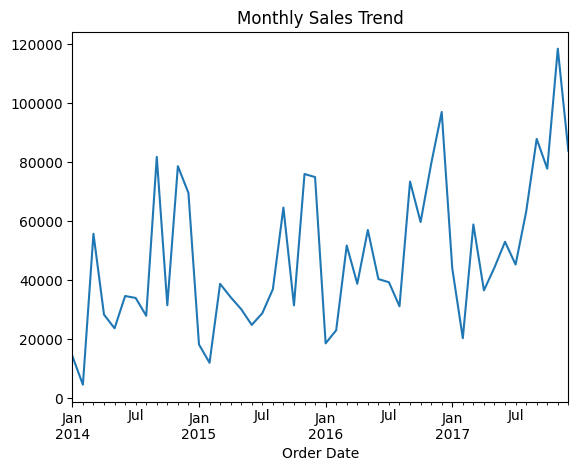

In [14]:

monthly.plot()
plt.title("Monthly Sales Trend")
plt.show()


In [15]:
loss_products = (
    df.groupby("Product Name")["Profit"]
    .sum()
    .sort_values()
    .head(10)
)


In [16]:
loss_products.to_csv("Top_Loss_Products.csv")

